# Comprehensive Workflow
 
In this lesson we will learn the workflow for a basic machine learning problem.
 
<img src="figures/workflow3.png">


## Introduction
This is a **A Comprehensive ML Workflow** using the House Prices data set.
If you can learn and review your knowledge about ML with a simple dataset, you can start to memorize this workflow for your journey in Data science world.



## Machine Learning Workflow
Most of eBooks books share the following steps:
1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory data analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining

Of course, the same solution can not be provided for all problems, so the best way is to create a **general framework** and adapt it to new problem.

**You can see my workflow in the below image** :

 <img src="figures/workflow3.png">

**Data Science has so many techniques and procedures that can confuse anyone.**


## Problem Definition
The most important item when you start a new machine learning project is the definition of your problem.
Problem definition has four steps that have illustrated in the picture below:
<img src="figures/Problem_Definition2.png" width=300>



### Problem Features
We will use the house prices data set. 
This dataset contains information about house prices and the target value is:
1. SalePrice

Why are we using House price dataset:
1. This is a good project because it is so well understood.
1. Attributes are numeric and catagorical.
1. It is a Regression problem, allowing you to practice with perhaps an easier supervised learning algorithm.
1. Allows for creative feature engineering.


#### Metric
Results are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 
Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
<img src="figures/eG03B.png" width=200>


### Goal
It is our job to predict the sales price for each house. 
For each Id in the test set, you must predict the value of the **SalePrice** variable. 


### Variables
The variables are :
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* Neighborhood: Physical locations within Ames city limits
* HouseStyle: Style of dwelling
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale
* etc.


## Inputs & Outputs
For every machine learning problem you should ask yourself, "what are inputs and outputs for the model?"
<img src="figures/Input-Output.JPG" width=300 >


### Inputs
* train.csv - the training set
* test.csv - the test set


### Outputs
* sale prices for every record in test.csv


## Loading Packages
In this kernel we are using the following packages:
 <img src="figures/packages.png" width=300>

In [1]:
# Let's make sure the libraries are installed
#!pip install  sklearn
#!pip install  matplotlib
#!pip install  scipy
#!pip install  lightgbm
#!pip install  xgboost
#!pip install  seaborn
#!pip install  pandas
#!pip install  numpy

# Now import the libraries
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as stats
import lightgbm as lgb
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import json
import sys
import csv
import os

import warnings
warnings.filterwarnings('ignore')

### Version

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
sklearn: 0.20.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


A few tiny adjustments for better **code readability**

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

## Exploratory Data Analysis (EDA)
In this section, you'll learn how to use graphical and numerical techniques to begin uncovering the structure of your data. 
1. Which variables suggest interesting relationships?
1. Which observations are unusual?

By the end of the section, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.  
Then We will review analytical and statistical operations:
1. Data Collection
1. Visualization
1. Data Cleaning
1. Data Preprocessing

<img src="figures/EDA.png" width=300>


## Data Collection
Data collection is the process of gathering and measuring data.


In [4]:
# import Dataset to play with it
train = pd.read_csv('data/house_prices_train.csv')
test= pd.read_csv('data/house_prices_test.csv')

The **concat** function does all of the heavy lifting of performing concatenation operations along an axis.

In [5]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

**Note**
1. Each row is an observation (also known as : sample, example, instance, record)
1. Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

After loading the data via **pandas**, we should checkout the content is:

In [6]:
type(train),type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

## Statistical Summary
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.[7]

Don’t worry, each look at the data is **one command**. These are useful commands that you can use again and again on future projects.


In [7]:
# shape
print(train.shape)

(1460, 81)


Train has one column more than test why?   (yes ==>> **target value**)

In [8]:
# shape
print(test.shape)

(1459, 80)


We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

You should see 1460 instances and  81  attributes for train and 1459 instances and  80 attributes for test

Lets grab some information about the dataset:

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

You can see the type of data using following commands:

In [10]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [11]:
train["Fence"].value_counts()


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Copy Id for test and train data set

In [12]:
train_id=train['Id'].copy()
test_id=test['Id'].copy()

Check the first 5 rows of the data set:

In [13]:
train.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check last 5 rows of the data set:

In [14]:
train.tail() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Grab 5 random rows from the data set:

In [15]:
train.sample(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1394,1395,120,RL,53.000,4045,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
162,163,20,RL,95.000,12182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,220000
90,91,20,RL,60.000,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
1005,1006,80,RL,65.000,8385,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,149900
1159,1160,60,RL,76.000,9120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,185000


A statistical summary of the dataset:

In [16]:
train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


To check out how many nulls are in the dataset:

In [17]:
train.isnull().sum().head(2)

Id            0
MSSubClass    0
dtype: int64

In [18]:
train.groupby('SaleType').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,43,43,43,32,43,43,3,43,43,43,...,43,43,0,13,2,43,43,43,43,43
CWD,4,4,4,4,4,4,1,4,4,4,...,4,4,0,2,0,4,4,4,4,4
Con,2,2,2,2,2,2,0,2,2,2,...,2,2,0,0,0,2,2,2,2,2
ConLD,9,9,9,8,9,9,0,9,9,9,...,9,9,0,2,1,9,9,9,9,9
ConLI,5,5,5,4,5,5,1,5,5,5,...,5,5,0,1,1,5,5,5,5,5
ConLw,5,5,5,5,5,5,0,5,5,5,...,5,5,0,0,0,5,5,5,5,5
New,122,122,122,121,122,122,7,122,122,122,...,122,122,1,0,0,122,122,122,122,122
Oth,3,3,3,3,3,3,0,3,3,3,...,3,3,0,1,1,3,3,3,3,3
WD,1267,1267,1267,1022,1267,1267,79,1267,1267,1267,...,1267,1267,6,262,49,1267,1267,1267,1267,1267


Print dataset **columns**:

In [19]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
type((train.columns))

pandas.core.indexes.base.Index

**Note**
Pandas's data frame can be used to perform queries like "where"

In [21]:
train[train['SalePrice']>700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.000,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.000,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## Target Value Analysis
Because **SalePrice** is our target value, we should evaluate that data

In [22]:
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

Flexibly plot a univariate distribution of observations.



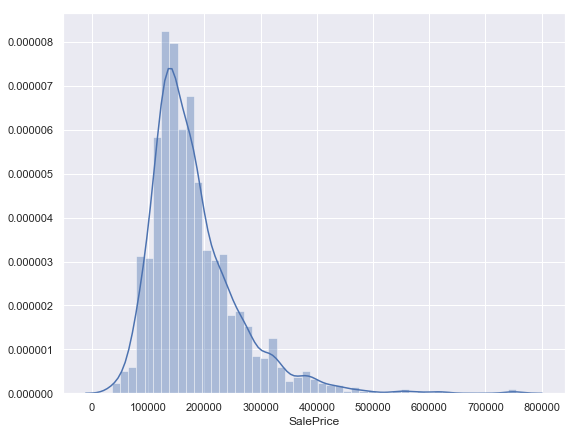

In [23]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['SalePrice']);

### Skewness vs Kurtosis
1. Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. 
It measures the lack of symmetry in data distribution. 
It differentiates extreme values in one versus the other tail. 
A symmetrical distribution will have a skewness of 0.

1. Kurtosis is all about the tails of the distribution — not the peakedness or flatness. 
It is used to describe the extreme values in one versus the other tail. 
It is actually the measure of outliers present in the distribution.


In [24]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Visualization
**Data visualization**  is the presentation of data in a graphical format. 
It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

 <img src="figures/visualization.jpg" width=350>

### Scatter plot

Scatter plot Purpose To identify the type of relationship (if any) between two quantitative variables.

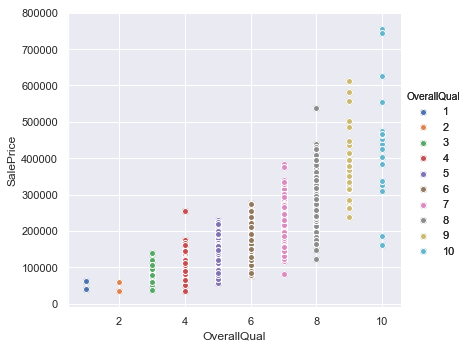

In [25]:
# Modify the graph above by assigning each species an individual color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
g=sns.FacetGrid(train[columns], hue="OverallQual", size=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend();
plt.show()


### Box
In descriptive statistics, a **box plot** or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

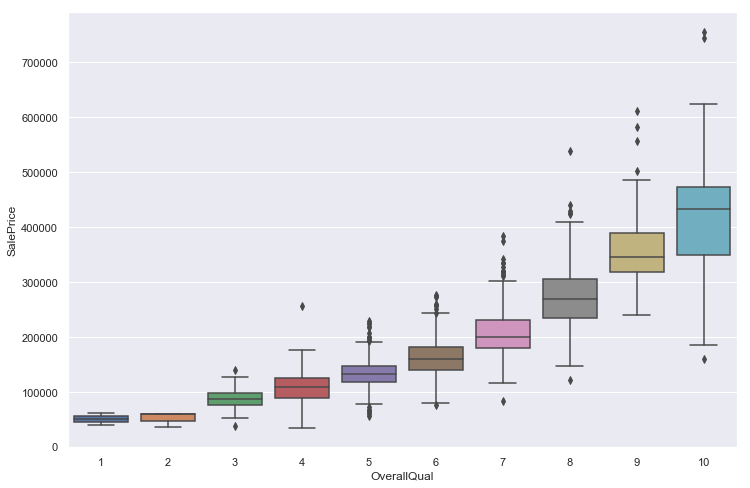

In [26]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)


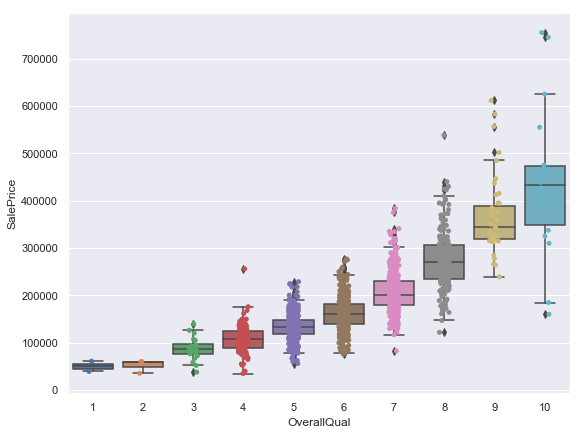

In [27]:
ax= sns.boxplot(x="OverallQual", y="SalePrice", data=train[columns])
ax= sns.stripplot(x="OverallQual", y="SalePrice", data=train[columns], jitter=True, edgecolor="gray")
plt.show()

### Histogram
We can also create a **histogram** of each input variable to get an idea of the distribution.

<Figure size 648x504 with 0 Axes>

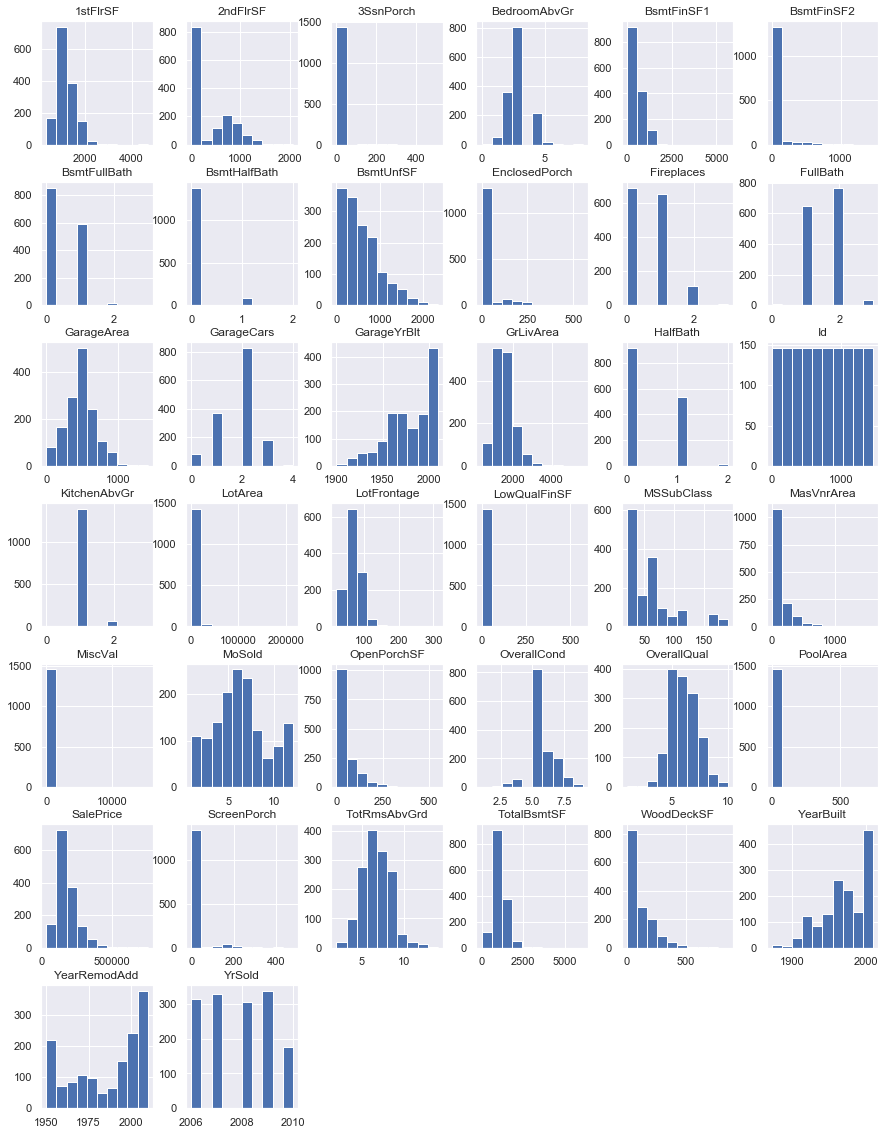

<Figure size 648x504 with 0 Axes>

In [28]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

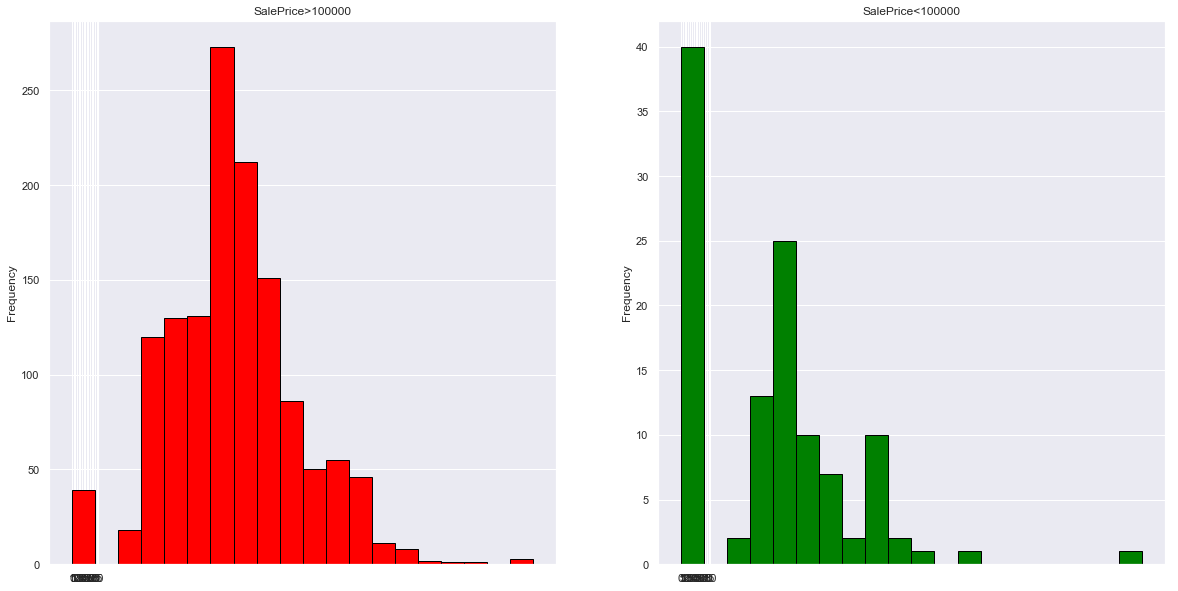

In [29]:
mini_train=train[columns]
f,ax=plt.subplots(1,2,figsize=(20,10))
mini_train[mini_train['SalePrice']>100000].GarageArea.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('SalePrice>100000')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
mini_train[mini_train['SalePrice']<100000].GarageArea.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('SalePrice<100000')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

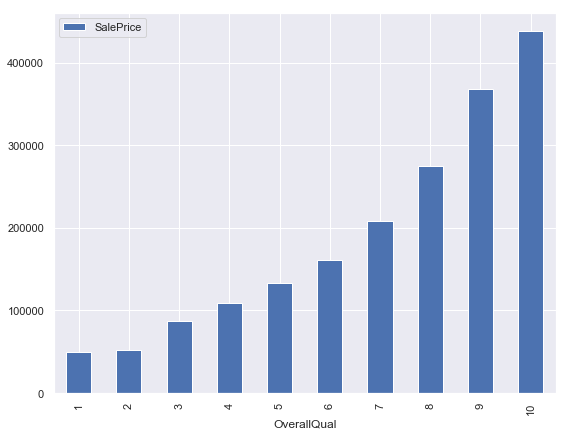

In [30]:
 
mini_train[['SalePrice','OverallQual']].groupby(['OverallQual']).mean().plot.bar()
 

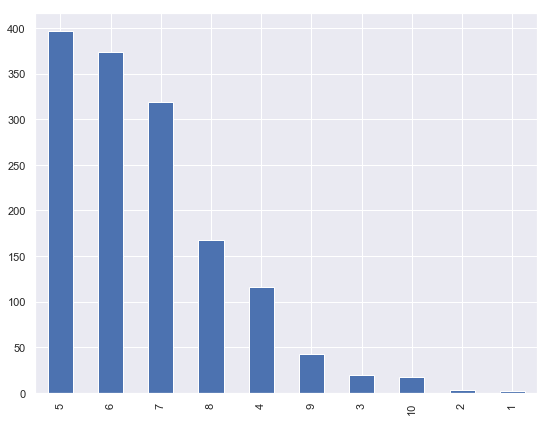

In [31]:
train['OverallQual'].value_counts().plot(kind="bar");

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



### Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

<Figure size 648x504 with 0 Axes>

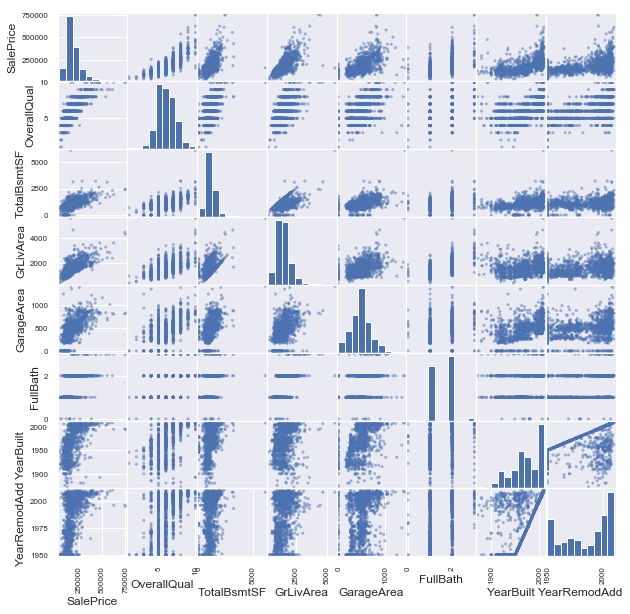

<Figure size 648x504 with 0 Axes>

In [32]:

# scatter plot matrix
pd.plotting.scatter_matrix(train[columns],figsize=(10,10))
plt.figure()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

### Violin Plots

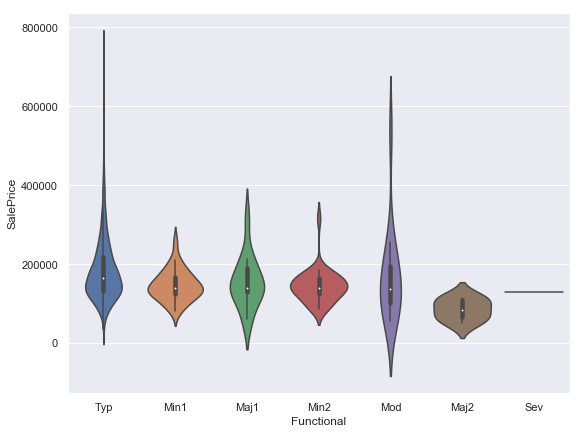

In [33]:
# violinplots on petal-length for each species
sns.violinplot(data=train,x="Functional", y="SalePrice")

### Pair Plot

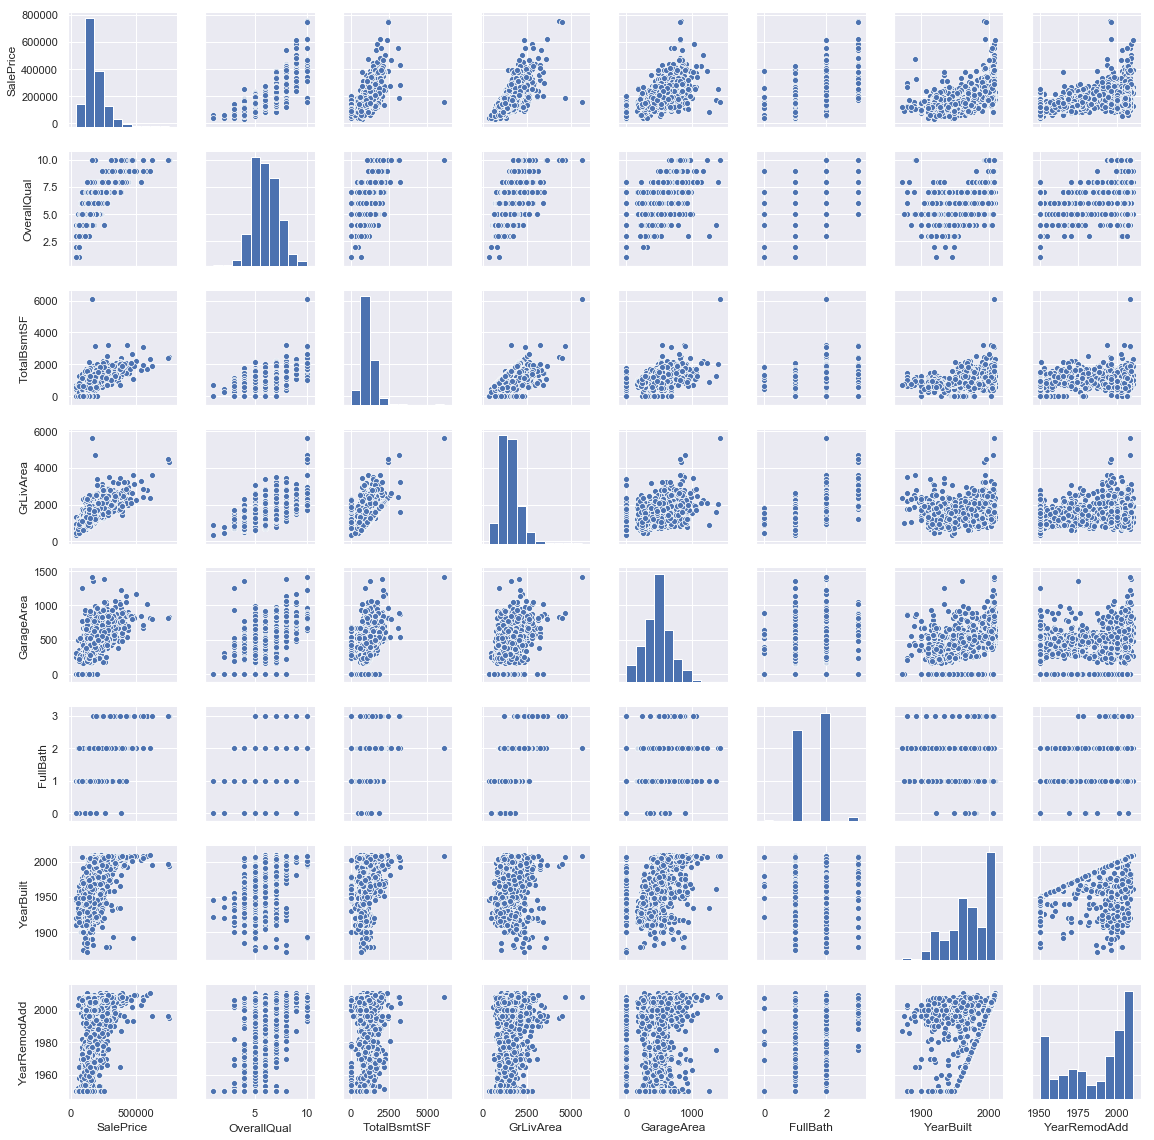

In [34]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter')
plt.show()

###  KDE Plot

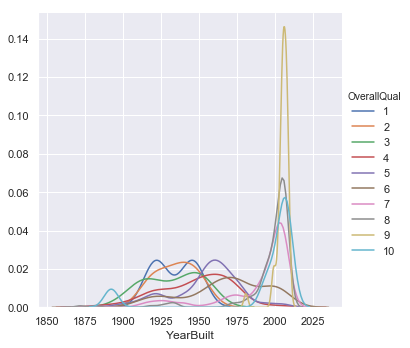

In [35]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.FacetGrid(train[columns], hue="OverallQual", size=5).map(sns.kdeplot, "YearBuilt").add_legend()
plt.show()

### Joint Plot

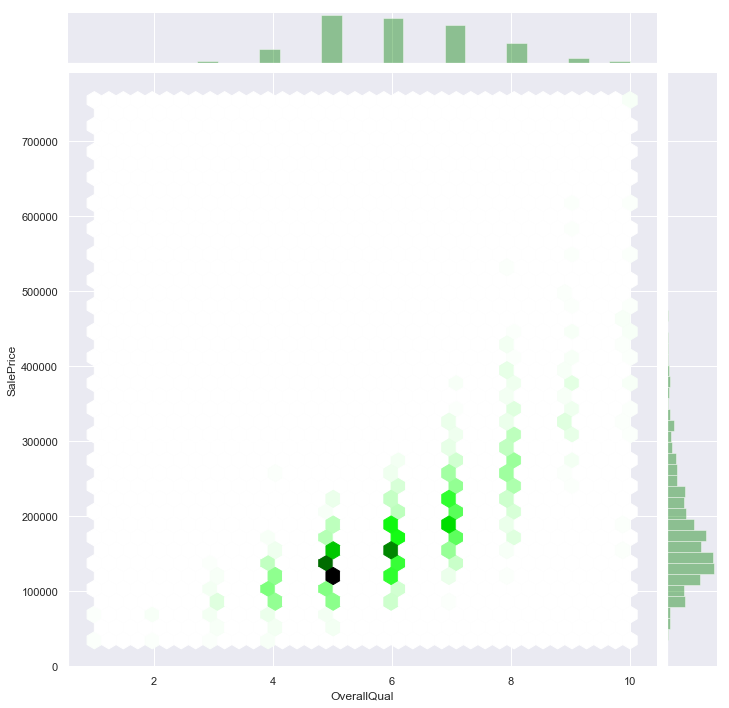

In [36]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.jointplot(x="OverallQual", y="SalePrice", data=train[columns], size=10,ratio=10, kind='hex',color='green')
plt.show()

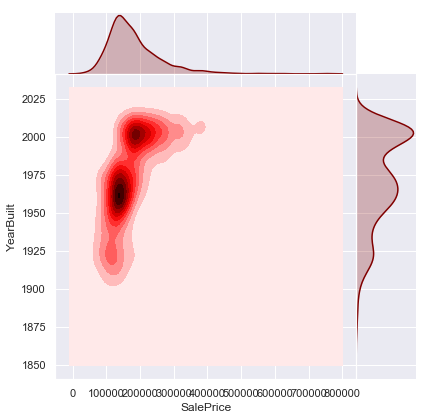

In [37]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.jointplot(x="SalePrice", y="YearBuilt", data=train[columns], size=6, kind='kde', color='#800000', space=0)

### Heatmap

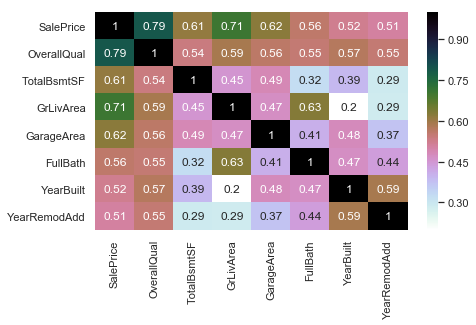

In [38]:
plt.figure(figsize=(7,4)) 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.heatmap(train[columns].corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### RadViz

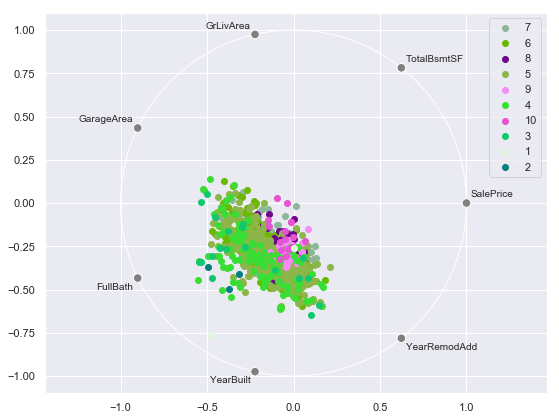

In [39]:
from pandas.plotting import radviz
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
radviz(train[columns], "OverallQual")

###  Factor Plot

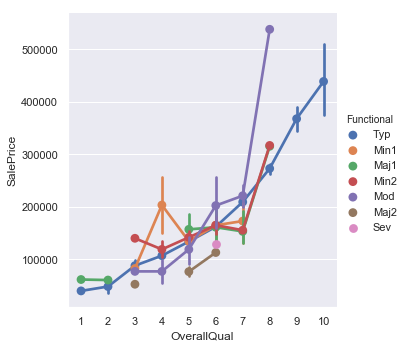

In [40]:
sns.factorplot('OverallQual','SalePrice',hue='Functional',data=train)
plt.show()

## Data Preprocessing
**Data preprocessing** refers to the transformations applied to our data before feeding it to the algorithm.
 
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
there are plenty of steps for data preprocessing and we just listed some of them :
1. Removing Target column (id)
1. Sampling (without replacement)
1. Making part of the data unbalanced and balancing (with undersampling and SMOTE)
1. Introducing missing values and treating them (replacing by average values)
1. Noise filtering
1. Data discretization
1. Normalization and standardization
1. PCA analysis
1. Feature selection (filter, embedded, wrapper)


## Noise filtering (Outliers)
An outlier is an observation that is abnormal relative to normal observations in a sample set.

<img src='figures/outlier.jpeg' width=400>


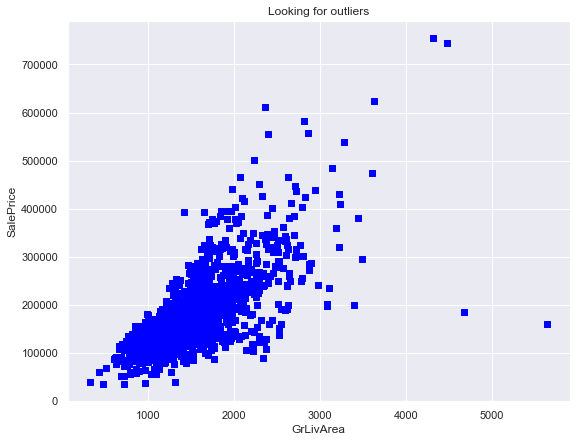

In [41]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]

2 extreme outliers on the bottom right

In [42]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [43]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [44]:
all_data = pd.get_dummies(all_data)

In [45]:
# Log transform the target for official scoring
#The key point is to to log_transform the numeric variables since most of them are skewed.
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

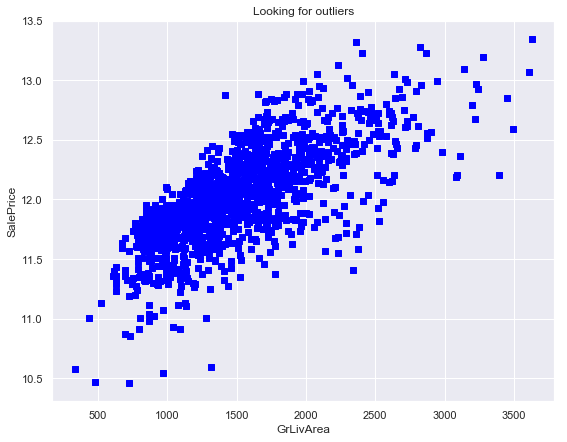

In [46]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

## Data Cleaning
When dealing with real-world data, dirty data is the norm rather than the exception. 
We continuously need to predict correct values, and find links between various data artifacts such as schemas and records. 
We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

## Missing values
First, understand that there is NO good way to deal with missing data
<img src='figures/missing_data.png' width=600>

In [47]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

## Model Deployment
In this section have been applied plenty of  ** learning algorithms** that play an important rule in your experiences and improve your knowledge in case of ML technique.

**Note**
The results shown here may be slightly different for your analysis because, for example, the neural network algorithms use random number generators for fixing the initial value of the weights (starting points) of the neural networks, which often result in obtaining slightly different (local minima) solutions each time you run the analysis. Also note that changing the seed for the random number generator used to create the train, test, and validation samples can change your results.

## Families of ML algorithms
There are several categories for machine learning algorithms, below are some of these categories:

<img src="figures/ML_flow_chart.png">

**Not all algorithms work on all problems!**

## Accuracy vs. Precision
One of the most important questions to ask as a machine learning engineer when evaluating our model is how to judge our own model?
Each machine learning model is trying to solve a problem with a different objective using a different dataset and hence, it is important to understand the context before choosing a metric.
<img src='figures/precision_accuracy.png' width=500>
<a id="721"></a> <br>


### RMSE
Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
<img src='figures/rmse.png' width=200>

In [48]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(25), int64(11), uint8(252)
memory usage: 779.2 KB


## Ridge 

In [50]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [51]:
model_ridge = Ridge()

In [52]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

## Root Mean Squared Error

Text(0, 0.5, 'rmse')

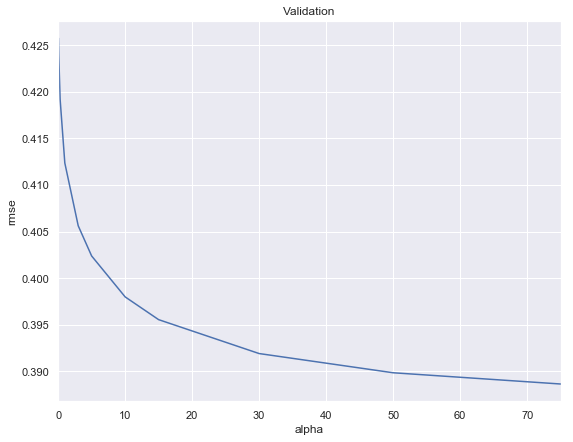

In [53]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [54]:
# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y)

#predict on train set
y_pred_train=cv.predict(X_train)

# Predict test set
y_pred_test=cv.predict(X_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.3281144671244509


## Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [55]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=num_test, random_state=100)

In [56]:
# Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_train, y_train)

0.8773341683133137

## XGBoost
XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.


### Why is XGBoost so popular?

1. Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

1. Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

1. Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

1. Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.[10]

> XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, keep on reading.

In [57]:
# Initialize model
from xgboost.sklearn import XGBRegressor
XGB_Regressor = XGBRegressor()                  

# Fit the model on our data
XGB_Regressor.fit(X_train, y_train)

[09:46:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [58]:
# Score model
XGB_Regressor.score(X_train, y_train)

0.4598271920204544

## Lasso CV
Lasso linear model with iterative fitting along a regularization path.
The best model is selected by cross-validation.

In [59]:
lasso=LassoCV()

In [60]:
# Fit the model on our data
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [61]:
# Score model
lasso.score(X_train, y_train)

0.11718149741641103

## Gradient Boosting Regressor
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [62]:
boostingregressor=GradientBoostingRegressor()

In [63]:
# Fit the model on our data
boostingregressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
# Score model
boostingregressor.score(X_train, y_train)

0.4931895744123065

## DecisionTree

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
dt = DecisionTreeRegressor(random_state=1)



In [66]:
# Fit model
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [67]:
dt.score(X_train, y_train)

0.9999999994606554

## ExtraTreeRegressor

In [68]:
from sklearn.tree import ExtraTreeRegressor

dtr = ExtraTreeRegressor()

In [69]:
# Fit model
dtr.fit(X_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [70]:
# Fit model
dtr.score(X_train, y_train)

0.9999999997734865